<a href="https://colab.research.google.com/github/srinath9121/https-github.com-srinath9121-Analysis-on--Student-grade-prediction--regression-Prediction-using-ML/blob/main/Student_grade_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project PPT

Drive link:https://drive.google.com/file/d/1FaDX23ciat-DHgDHzQiX7tW5inmett4Z/view?usp=drive_link

# libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
from sklearn.feature_selection import SelectFromModel
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop


In [ ]:
df=pd.read_csv('student-por.csv',sep=';')

In [ ]:
df = df.drop(columns=['failures'])

In [ ]:
# Display the first 5 rows to confirm loading
print("First 5 rows of the DataFrame:")
print(df.head())

# Display the last 5 rows to check the end of the dataset
print("\nLast 5 rows of the DataFrame:")
print(df.tail())

# Get a concise summary of the DataFrame (data types, non-null values)
print("\nDataFrame Info:")
print(df.info())

# Check for any missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Get the dimensions of the dataset
print(f"\nDataset shape: {df.shape}")

First 5 rows of the DataFrame:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc Walc health absences  G1  G2  G3  
0      4        3      4     1    1      3        4   0  11  11  
1      5        3      3     1    1      3        2   9  11  11  
2      4        3      2     2    3      3        6  12  13  12  
3      3        2      2     1    1      5        0  14  14  14  
4      4        3      2     1    2      5        0  11  13  13  

[5 rows x 32 columns]

Last 5 rows of the DataFrame:
    school sex  age address fams

# Data Cleaning

In [ ]:
# Rename columns for clarity
rename_dict = {
    'sex': 'gender', 'Mjob': 'mother_job', 'Fjob': 'father_job',
    'famsize': 'family_size', 'Pstatus': 'parent_status',
    'Medu': 'mother_education', 'Fedu': 'father_education',
    'traveltime': 'travel_time', 'famrel': 'family_relationship',
    'goout': 'going_out', 'absences': 'absences_count',
    'G1': 'grade_1', 'G2': 'grade_2', 'G3': 'final_grade',
    'Dalc': 'daily_alcohol', 'Walc': 'weekend_alcohol'
}
df.rename(columns=rename_dict, inplace=True)

In [ ]:
#checking uniqure value to convert variables to numerical
for col in df:
  print(f"{col} = {df[col].unique()}")

school = ['GP' 'MS']
gender = ['F' 'M']
age = [18 17 15 16 19 22 20 21]
address = ['U' 'R']
family_size = ['GT3' 'LE3']
parent_status = ['A' 'T']
mother_education = [4 1 3 2 0]
father_education = [4 1 2 3 0]
mother_job = ['at_home' 'health' 'other' 'services' 'teacher']
father_job = ['teacher' 'other' 'services' 'health' 'at_home']
reason = ['course' 'other' 'home' 'reputation']
guardian = ['mother' 'father' 'other']
travel_time = [2 1 3 4]
studytime = [2 3 1 4]
schoolsup = ['yes' 'no']
famsup = ['no' 'yes']
paid = ['no' 'yes']
activities = ['no' 'yes']
nursery = ['yes' 'no']
higher = ['yes' 'no']
internet = ['no' 'yes']
romantic = ['no' 'yes']
family_relationship = [4 5 3 1 2]
freetime = [3 2 4 1 5]
going_out = [4 3 2 1 5]
daily_alcohol = [1 2 5 3 4]
weekend_alcohol = [1 3 2 4 5]
health = [3 5 1 2 4]
absences_count = [ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]
grade_1 = [ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]
grade_2 = [11 13 14 12 16 17  8 1

In [ ]:
binary_map = {
    'GP': 0, 'MS': 1,
    'F': 0, 'M': 1,
    'U': 1, 'R': 0,
    'GT3': 1, 'LE3': 0,
    'A': 0, 'T': 1,
    'yes': 1, 'no': 0
}

binary_cols = ['school', 'gender', 'address', 'family_size', 'parent_status',
               'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
               'higher', 'internet', 'romantic']

for col in binary_cols:
    df[col] = df[col].map(binary_map)


In [ ]:
df = pd.get_dummies(df, columns=['mother_job', 'father_job', 'reason', 'guardian'], drop_first=True)

# Convert all Boolean columns to integers
df = df.astype({col: int for col in df.columns if df[col].dtype == 'bool'})
df.shape

(649, 41)

<Axes: >

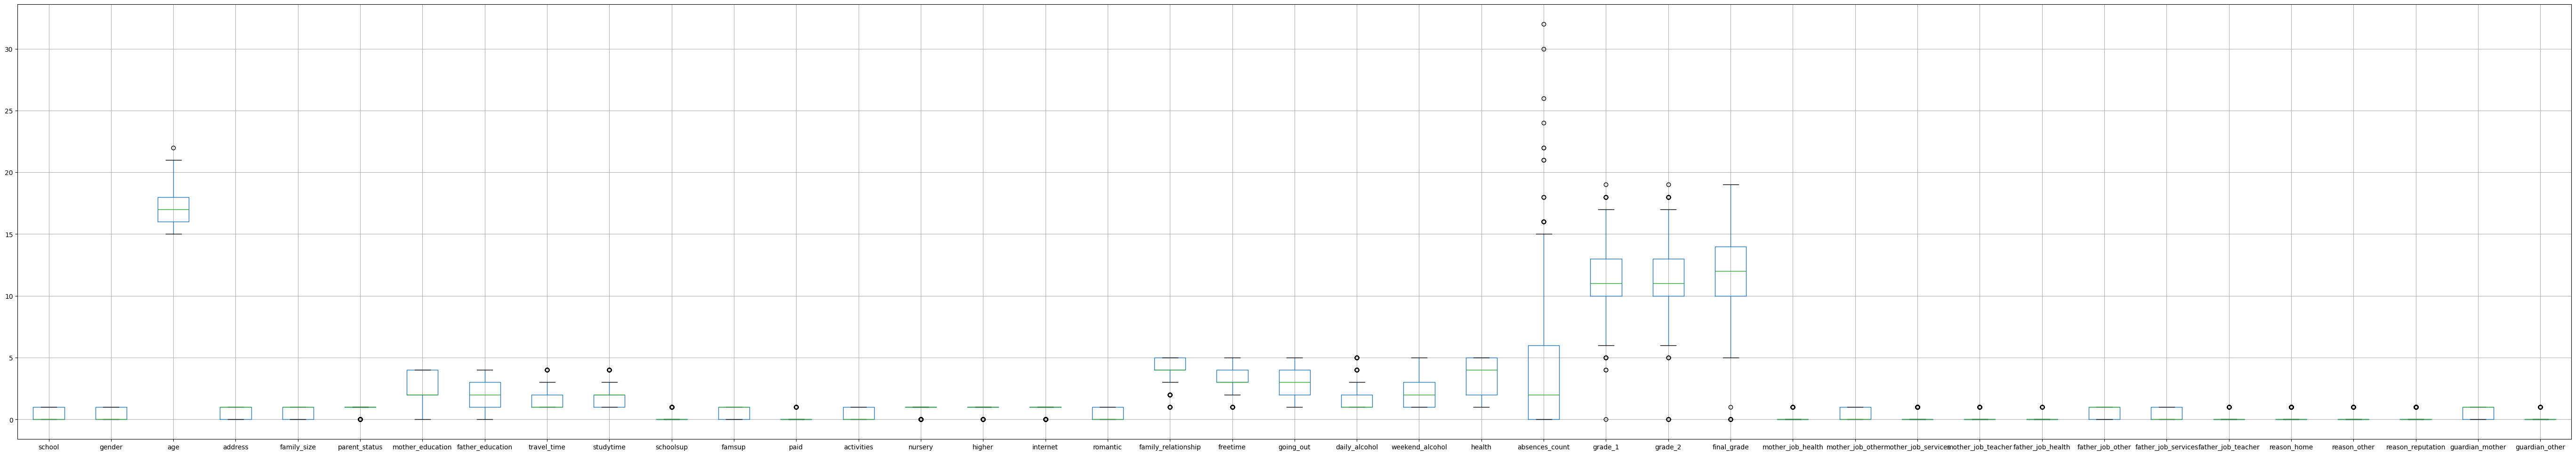

In [ ]:
df.boxplot(figsize=(70,12))

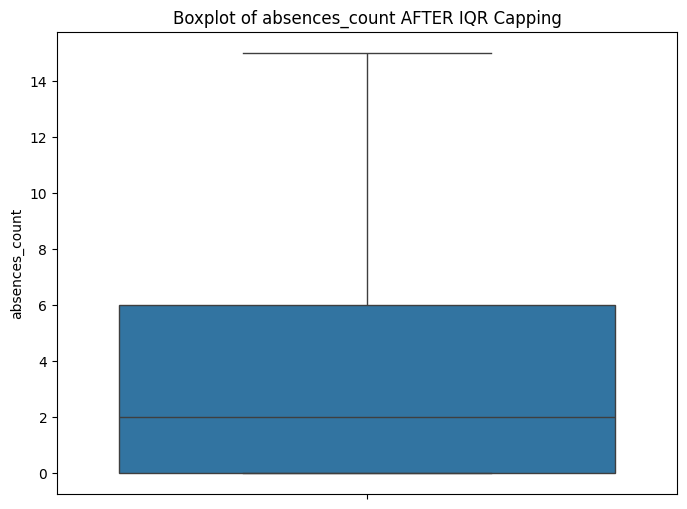

(649, 41)


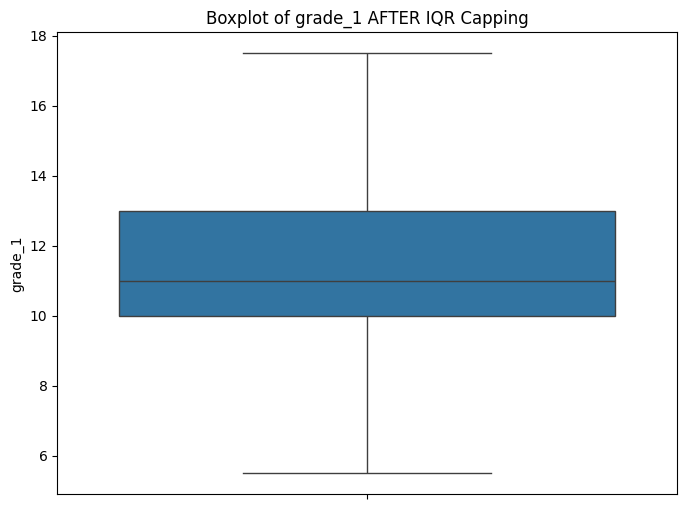

(649, 41)


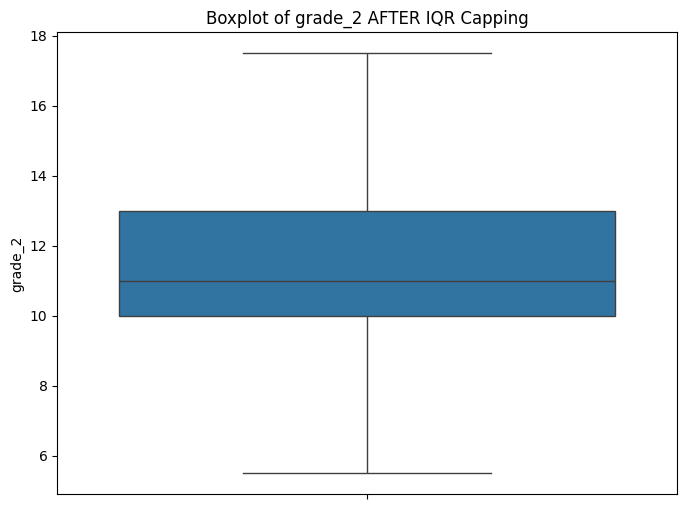

(649, 41)


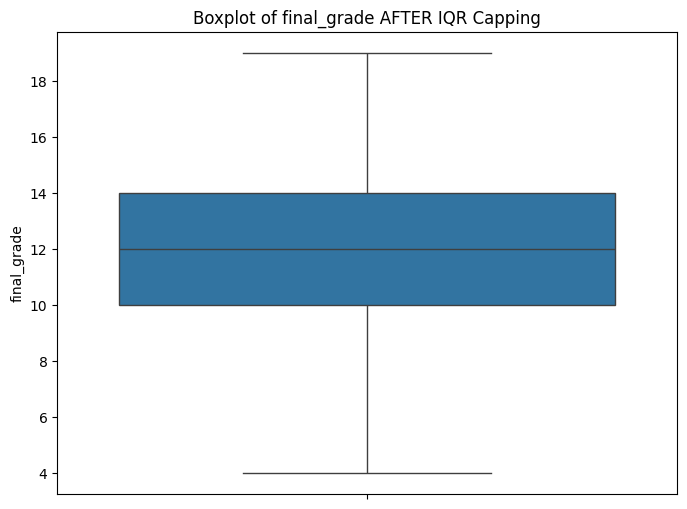

(649, 41)


In [ ]:
# IQR Capping
numerical_cols_for_capping = ['age', 'mother_education', 'father_education', 'travel_time',
                            'studytime', 'family_relationship', 'freetime',
                            'going_out', 'daily_alcohol', 'weekend_alcohol', 'health', 'absences_count',
                            'grade_1', 'grade_2', 'final_grade']
# Apply IQR capping logic
for col in numerical_cols_for_capping:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds (1.5 * IQR is a common multiplier for outlier detection)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values that fall outside the bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

for col in ['absences_count', 'grade_1', 'grade_2', 'final_grade']:
  plt.figure(figsize=(8, 6))
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot of {col} AFTER IQR Capping')
  plt.ylabel(col)
  plt.show()

  print(df.shape)

#EDA

In [ ]:
# Basic information
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Columns:", df.columns)
print("Summary statistics:",df.describe())

Number of rows: 649
Number of columns: 41
Columns: Index(['school', 'gender', 'age', 'address', 'family_size', 'parent_status',
       'mother_education', 'father_education', 'travel_time', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'family_relationship', 'freetime', 'going_out',
       'daily_alcohol', 'weekend_alcohol', 'health', 'absences_count',
       'grade_1', 'grade_2', 'final_grade', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher',
       'father_job_health', 'father_job_other', 'father_job_services',
       'father_job_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other'],
      dtype='object')
Summary statistics:            school      gender         age     address  family_size  \
count  649.000000  649.000000  649.000000  649.000000   649.000000   
mean     0.348228    0.409861   16.742681    0.696456     

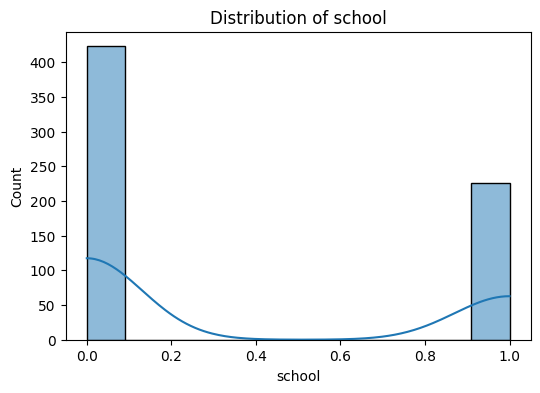

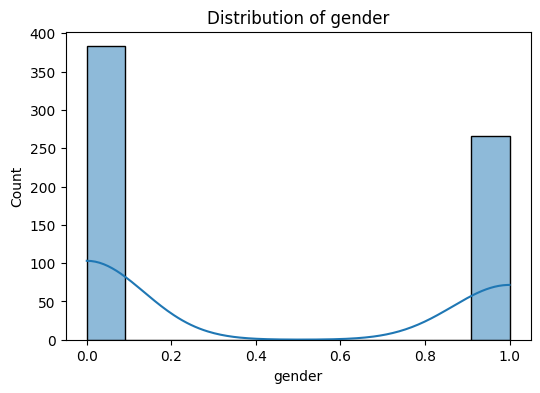

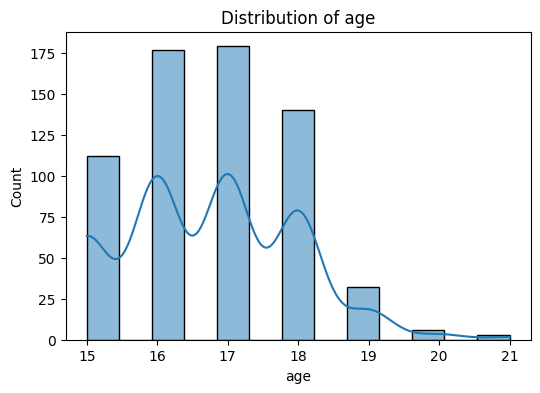

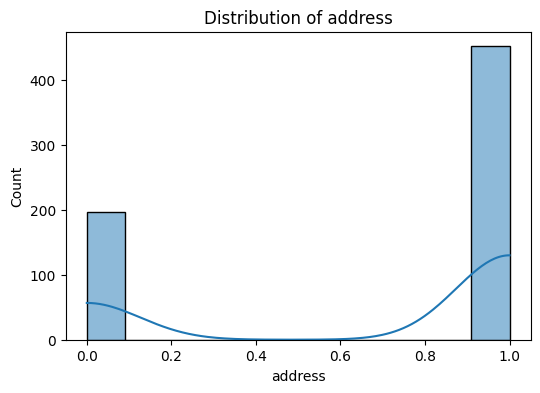

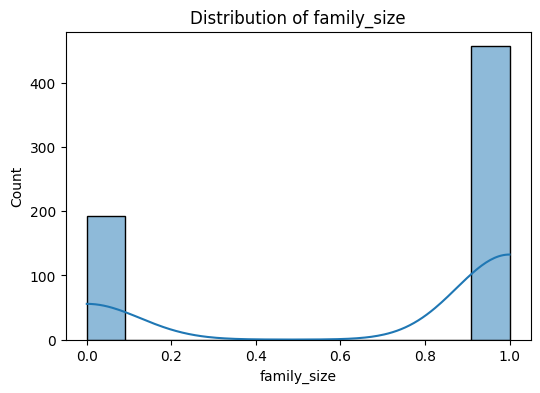

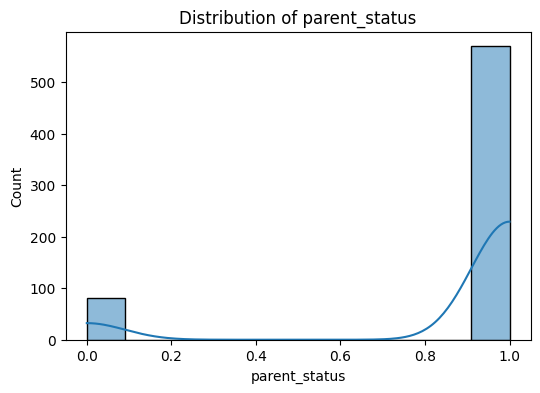

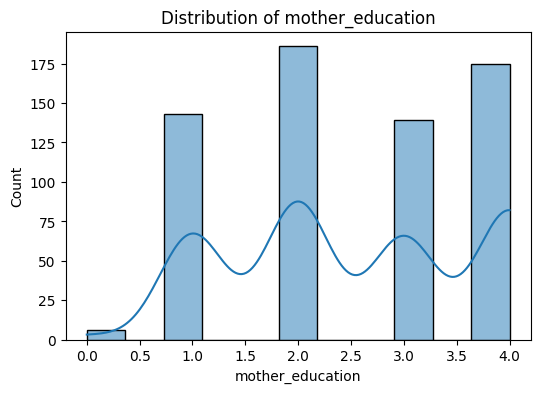

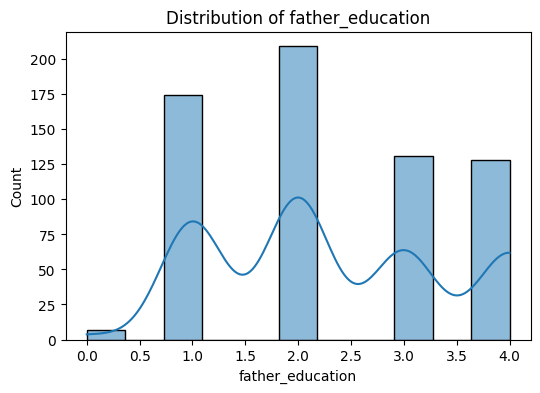

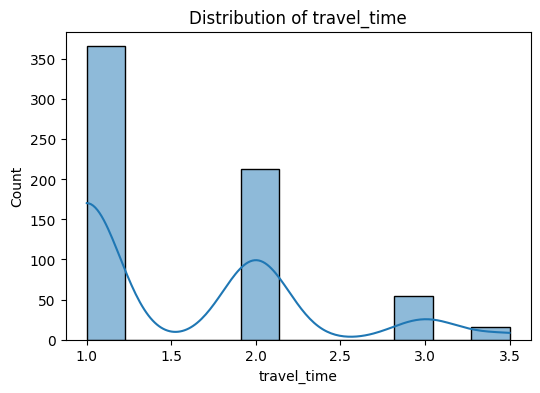

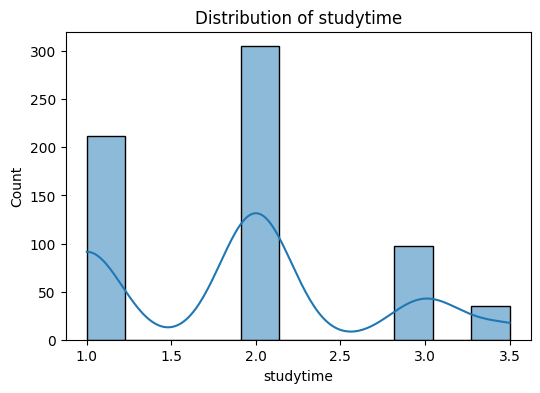

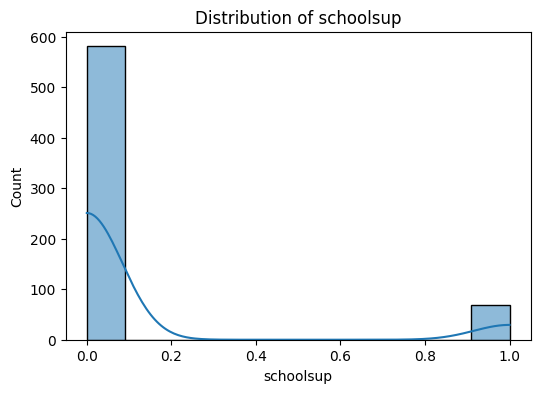

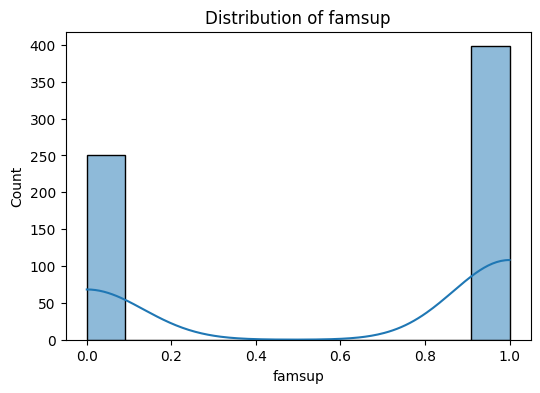

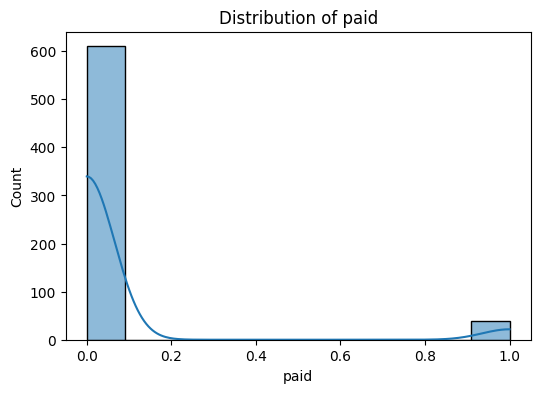

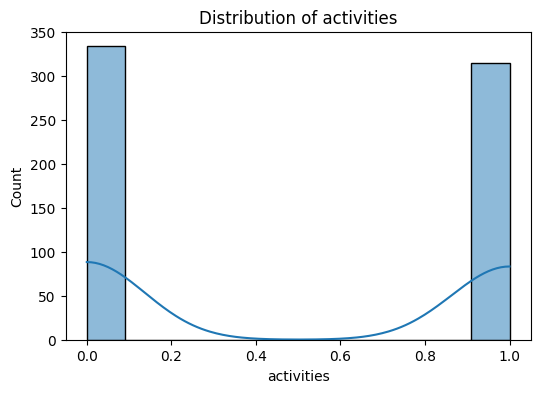

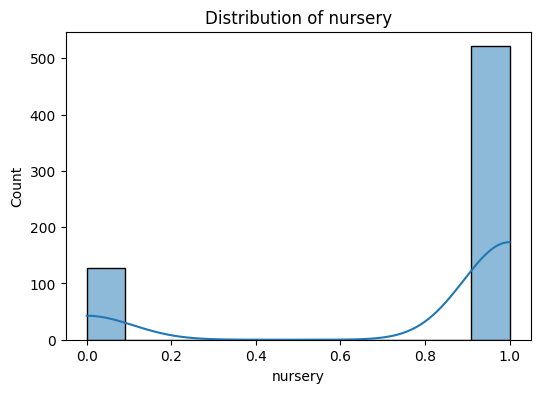

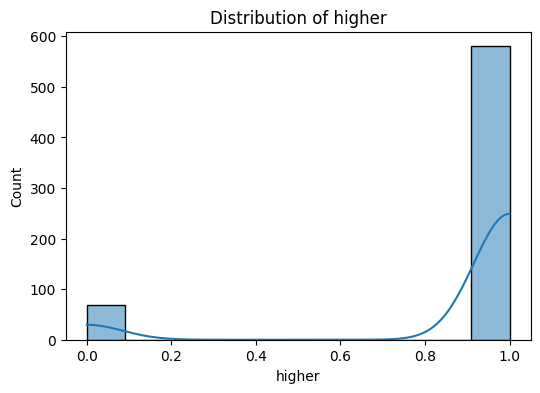

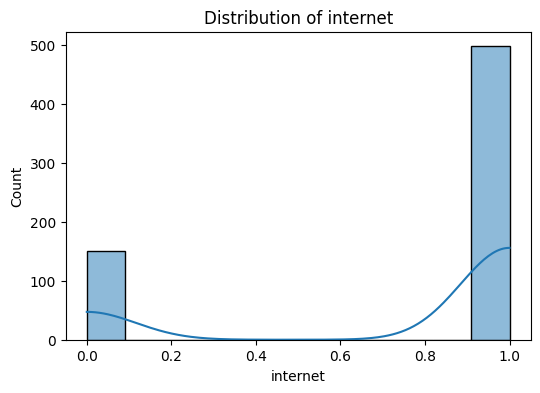

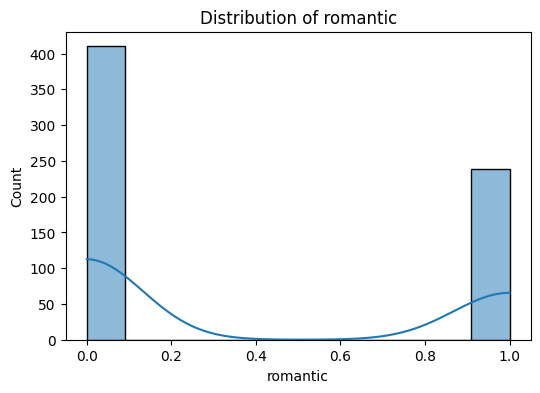

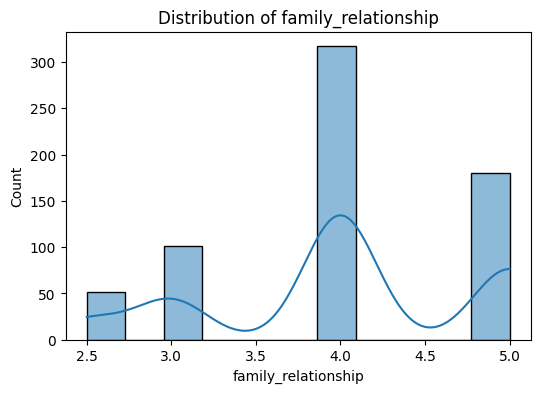

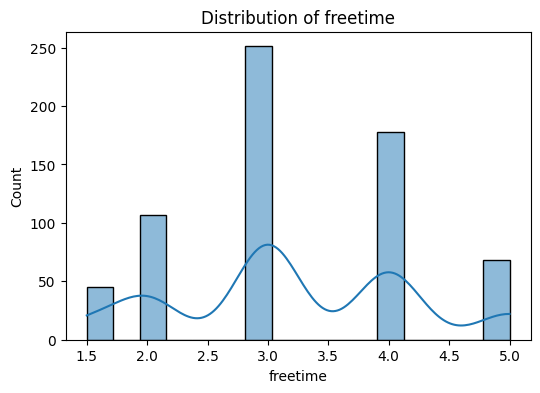

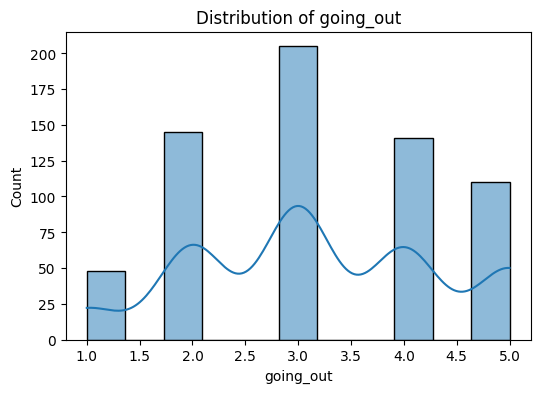

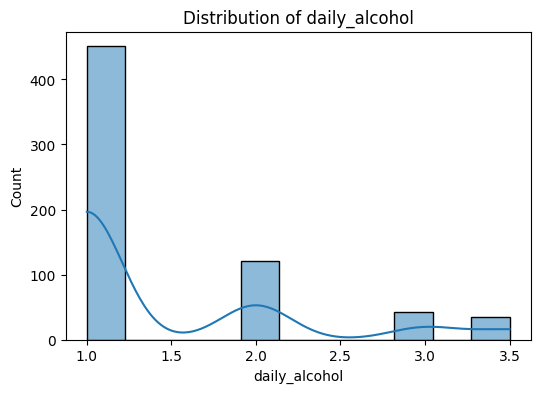

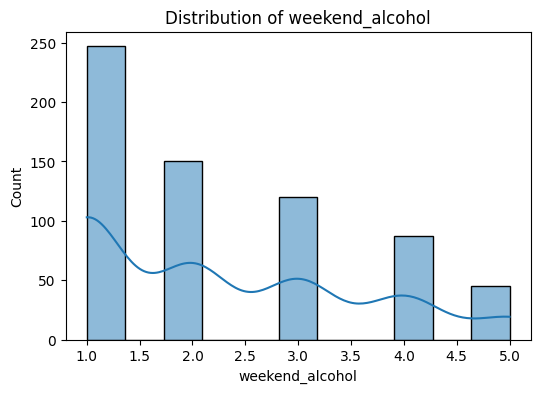

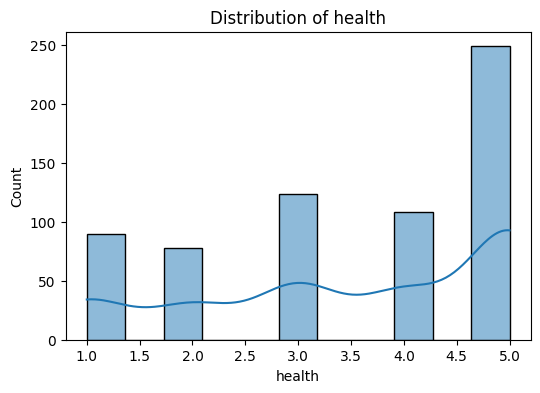

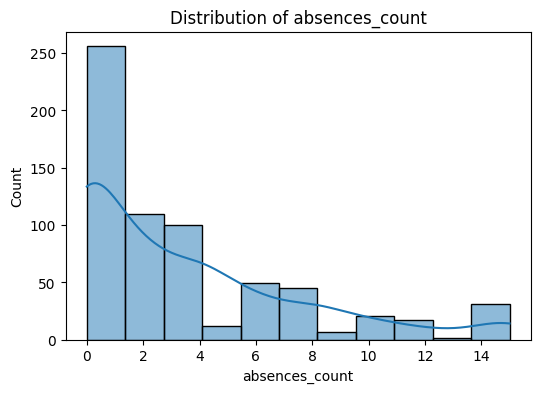

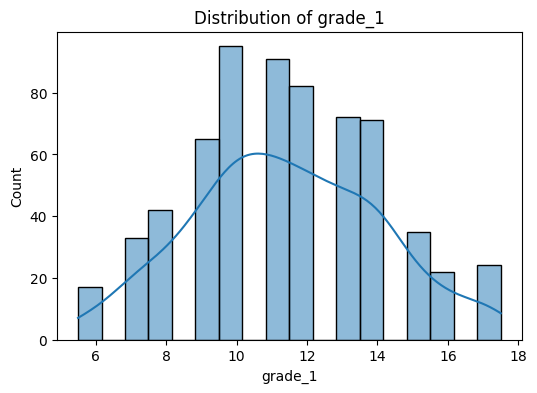

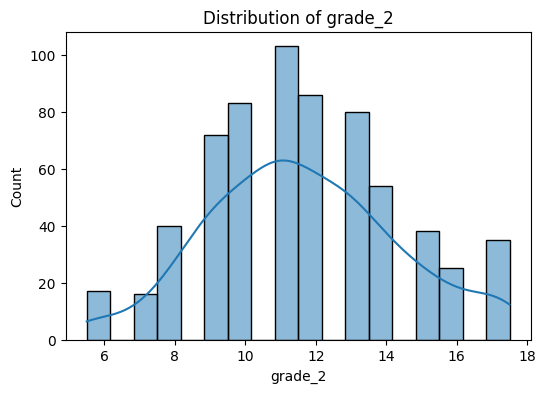

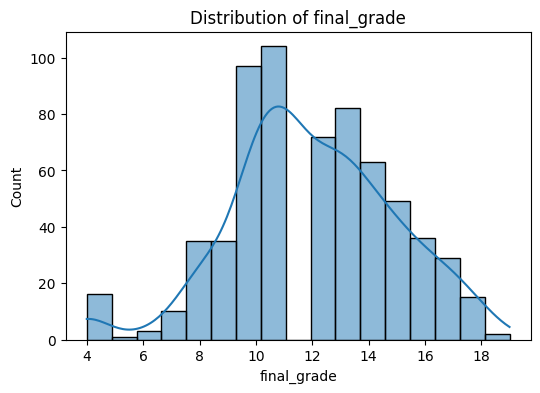

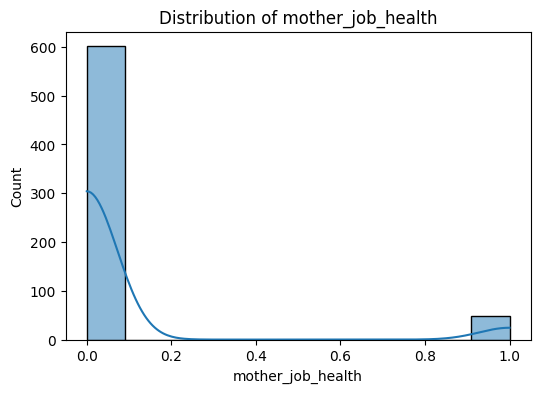

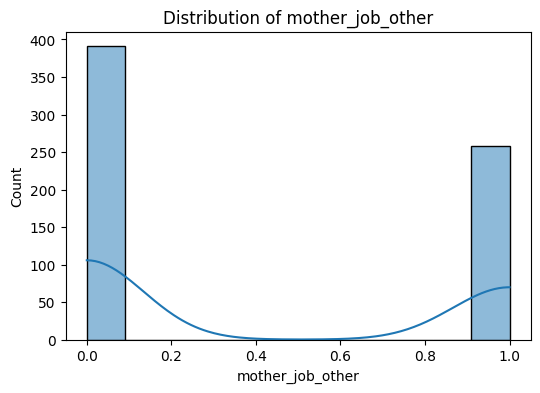

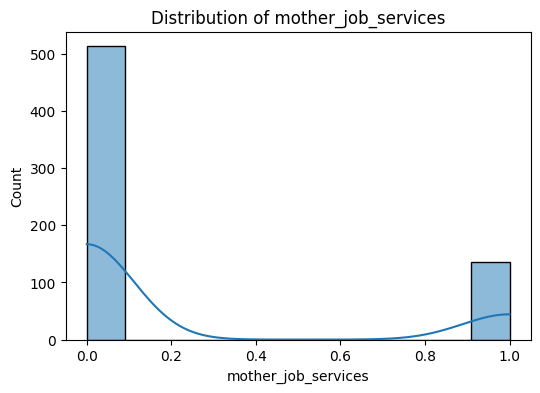

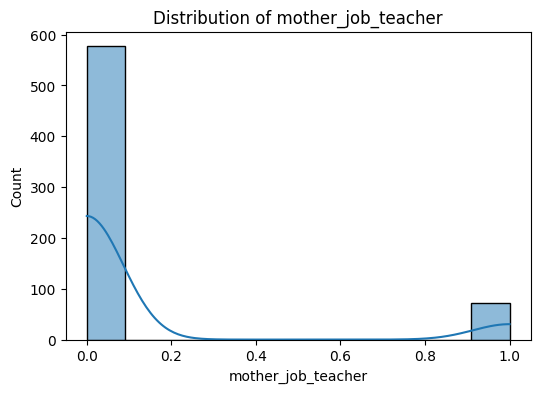

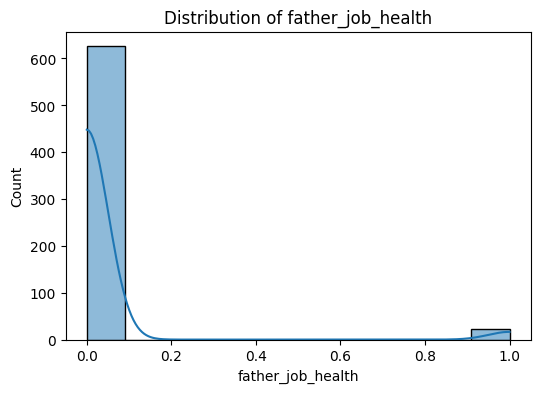

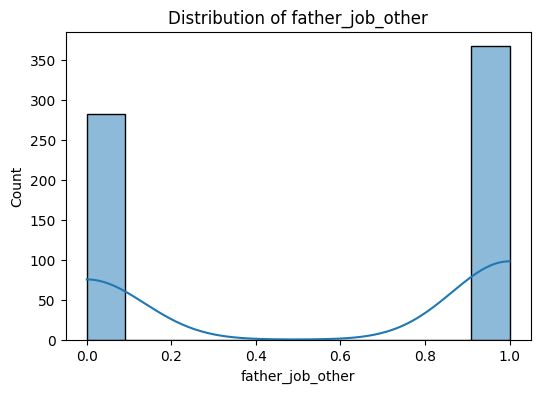

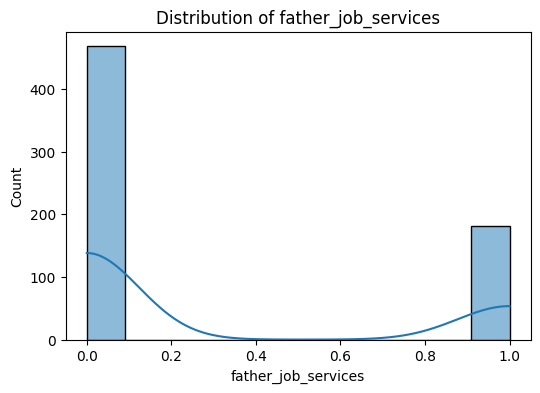

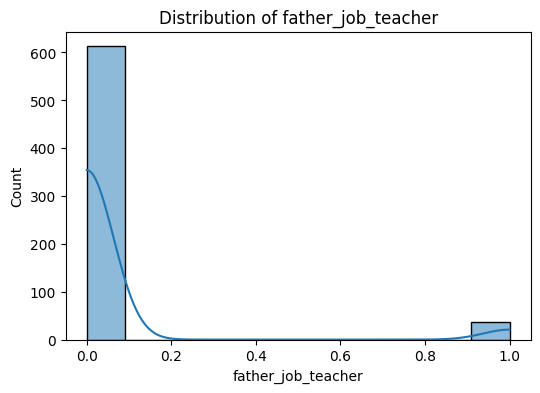

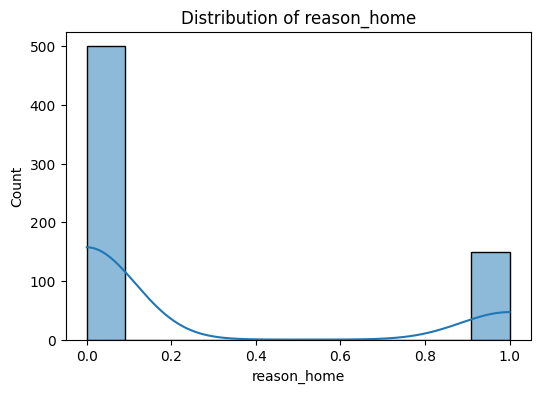

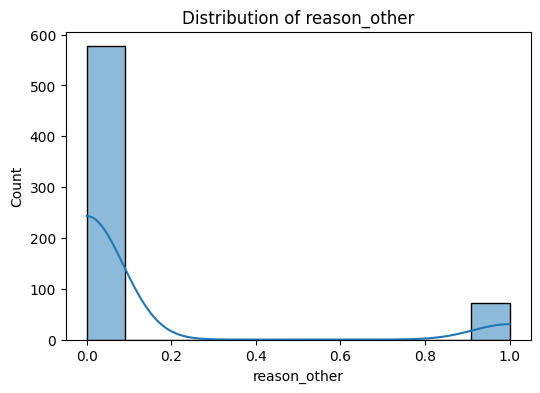

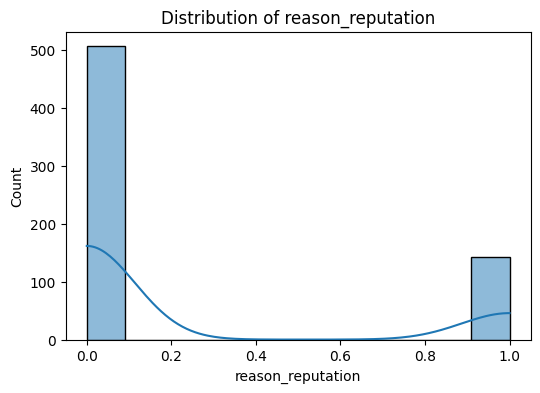

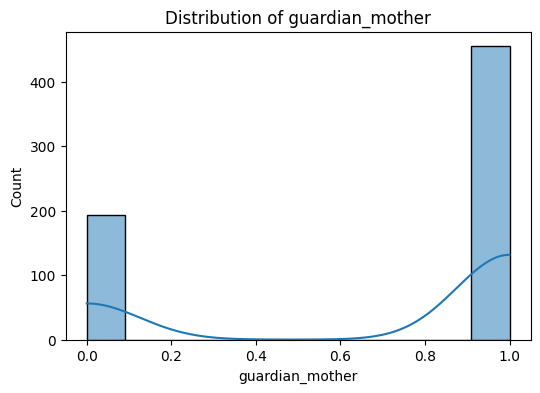

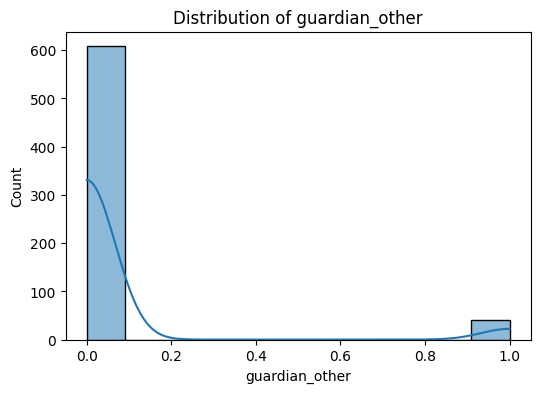

In [ ]:
# Univariate Analysis
for column in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()



<Axes: >

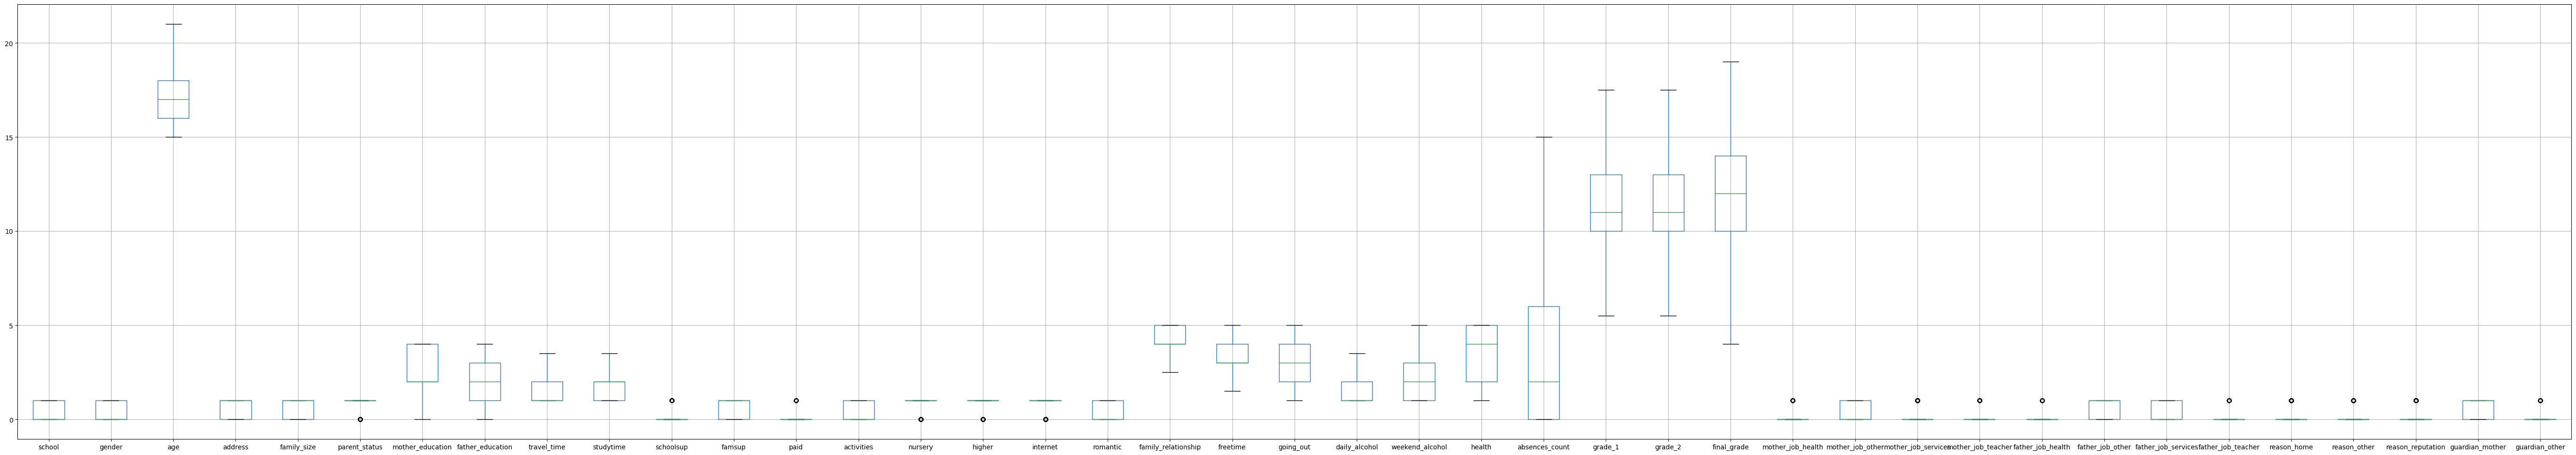

In [ ]:
df.boxplot(figsize=(70,12))

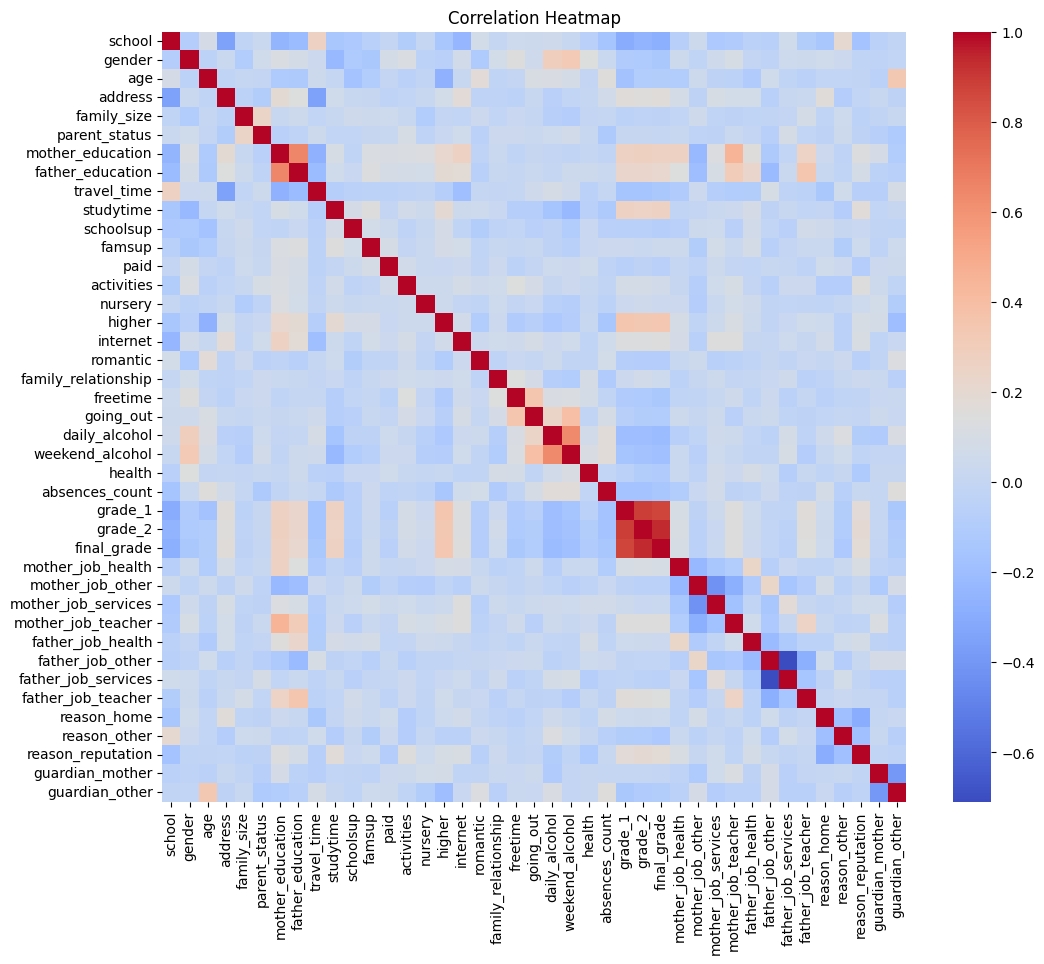

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

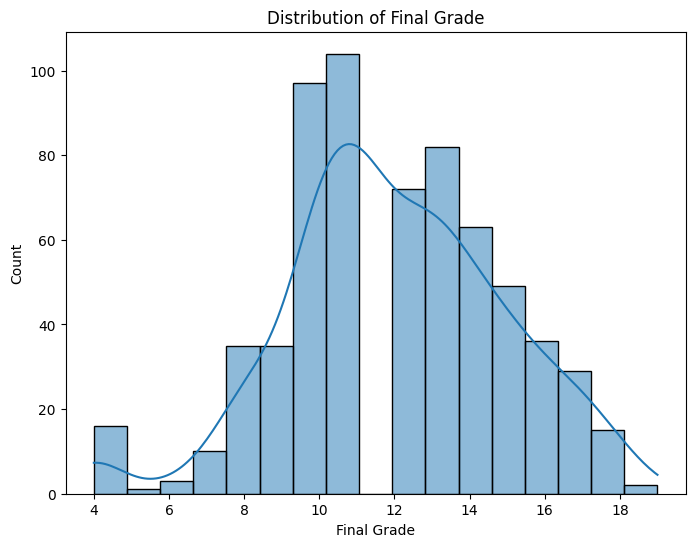

In [ ]:
# Distribution of the target variable (final_grade)
plt.figure(figsize=(8, 6))
sns.histplot(df['final_grade'], kde=True)
plt.title('Distribution of Final Grade')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

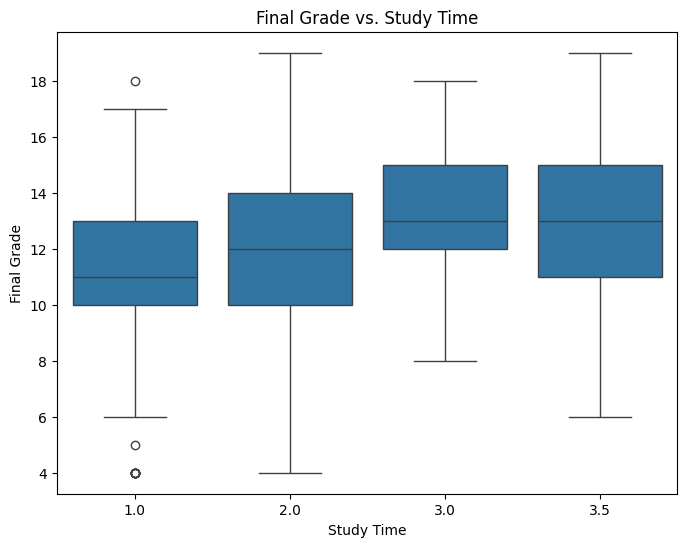

In [ ]:
# Relationship between study time and final grade
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='final_grade', data=df)
plt.title('Final Grade vs. Study Time')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()

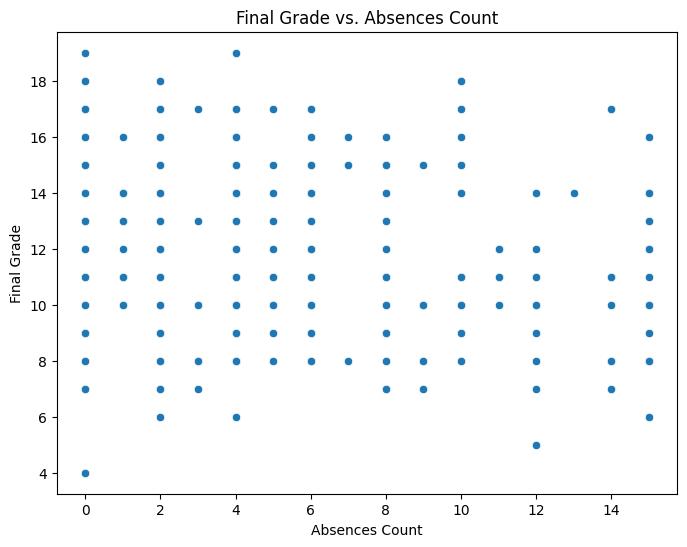

In [ ]:
# Relationship between absences and final grade
plt.figure(figsize=(8, 6))
sns.scatterplot(x='absences_count', y='final_grade', data=df)
plt.title('Final Grade vs. Absences Count')
plt.xlabel('Absences Count')
plt.ylabel('Final Grade')
plt.show()

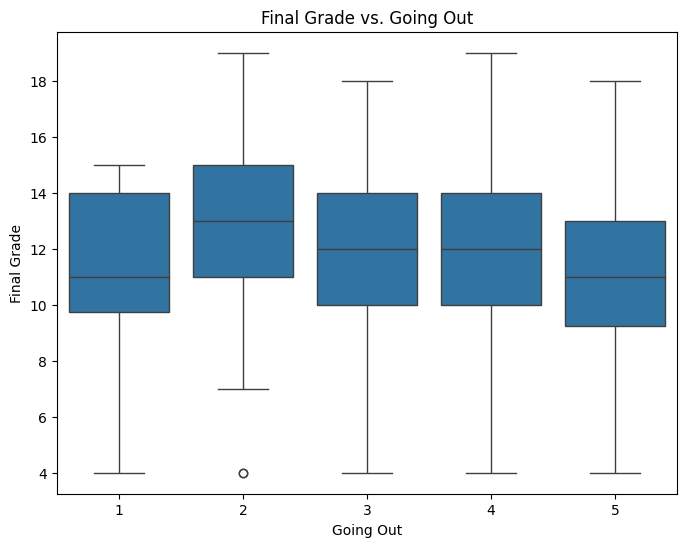

In [ ]:
# Relationship between going out and final grade
plt.figure(figsize=(8, 6))
sns.boxplot(x='going_out', y='final_grade', data=df)
plt.title('Final Grade vs. Going Out')
plt.xlabel('Going Out')
plt.ylabel('Final Grade')
plt.show()

# Feature selection

##understanding vif

In [ ]:
#vif
x=df.drop(columns=['final_grade'])
y=df['final_grade']
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_data

,feature,VIF
0,school,2.325375
1,gender,2.350437
2,age,91.352814
3,address,4.285674
4,family_size,3.847316
5,parent_status,9.581522
6,mother_education,15.924812
7,father_education,11.289553
8,travel_time,7.292093
9,studytime,9.020958


In [ ]:
# Recalculate VIF
def recalc(X):


  vif_data = pd.DataFrame()
  vif_data["Feature"] = X.columns
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                    for i in range(X.shape[1])]

  print(vif_data)

In [ ]:
x = x.drop(columns=["grade_2"])
recalc(x)

                Feature        VIF
0                school   2.324107
1                gender   2.348464
2                   age  88.929957
3               address   4.284219
4           family_size   3.846744
5         parent_status   9.581517
6      mother_education  15.921532
7      father_education  11.279610
8           travel_time   7.284747
9             studytime   9.020920
10            schoolsup   1.251530
11               famsup   2.856946
12                 paid   1.165697
13           activities   2.208462
14              nursery   5.360137
15               higher  11.799308
16             internet   5.314472
17             romantic   1.765881
18  family_relationship  29.483677
19             freetime  14.297586
20            going_out  12.079796
21        daily_alcohol   8.846005
22      weekend_alcohol   9.098436
23               health   7.864339
24       absences_count   2.135543
25              grade_1  26.631473
26    mother_job_health   1.938735
27     mother_job_ot

after removing the grade_2 column:


*   age:      91 - 88
*   grade_1:  102 - 26




In [ ]:
x = x.drop(columns=["age"])
recalc(x)

                Feature        VIF
0                school   2.118182
1                gender   2.347963
2               address   4.066109
3           family_size   3.812904
4         parent_status   9.108800
5      mother_education  15.843959
6      father_education  11.268714
7           travel_time   6.973867
8             studytime   8.711008
9             schoolsup   1.250931
10               famsup   2.856374
11                 paid   1.165691
12           activities   2.201671
13              nursery   5.230277
14               higher  11.797499
15             internet   5.297686
16             romantic   1.737837
17  family_relationship  26.798052
18             freetime  14.005362
19            going_out  12.056566
20        daily_alcohol   8.745262
21      weekend_alcohol   9.042744
22               health   7.655799
23       absences_count   2.042487
24              grade_1  24.346290
25    mother_job_health   1.937492
26     mother_job_other   3.312698
27  mother_job_servi

after removing age column:


*   travel_time: 7 - 6
*   study_time: 9 - 8
*   family_relationship: 29 - 26
*   grade_1: 26 - 24





In [ ]:
x = x.drop(columns=["family_relationship"])
recalc(x)

                Feature        VIF
0                school   2.083150
1                gender   2.318837
2               address   4.043157
3           family_size   3.811082
4         parent_status   9.009224
5      mother_education  15.804586
6      father_education  11.256789
7           travel_time   6.894888
8             studytime   8.682706
9             schoolsup   1.250779
10               famsup   2.850047
11                 paid   1.165011
12           activities   2.201524
13              nursery   5.180568
14               higher  11.768318
15             internet   5.276507
16             romantic   1.736626
17             freetime  13.473143
18            going_out  11.882847
19        daily_alcohol   8.742720
20      weekend_alcohol   8.907408
21               health   7.380704
22       absences_count   2.042412
23              grade_1  23.592152
24    mother_job_health   1.923237
25     mother_job_other   3.312562
26  mother_job_services   2.659492
27   mother_job_teac

after removing the family_relationship coulmn:


*   free_time: 14 - 13
*   going_out: 12 - 11
*weekend_alcohol: 9- 8
*grade_1: 24 - 23
*father_job_other: 10 - 9


In [ ]:
x = x.drop(columns=["grade_1"])
recalc(x)

                Feature        VIF
0                school   2.070764
1                gender   2.298943
2               address   3.944683
3           family_size   3.809291
4         parent_status   8.827613
5      mother_education  15.660330
6      father_education  11.187742
7           travel_time   6.782818
8             studytime   8.150125
9             schoolsup   1.228244
10               famsup   2.850033
11                 paid   1.159123
12           activities   2.197623
13              nursery   5.150333
14               higher  10.655665
15             internet   5.258650
16             romantic   1.736043
17             freetime  13.375023
18            going_out  11.870657
19        daily_alcohol   8.740144
20      weekend_alcohol   8.907032
21               health   7.338364
22       absences_count   2.030947
23    mother_job_health   1.922050
24     mother_job_other   3.295344
25  mother_job_services   2.657584
26   mother_job_teacher   2.522447
27    father_job_hea

after dropping the grade_1 column:


*   higher: 11 - 10



In [ ]:
x = x.drop(columns=["mother_education"])
recalc(x)

                Feature        VIF
0                school   2.070761
1                gender   2.284923
2               address   3.930303
3           family_size   3.796579
4         parent_status   8.820502
5      father_education   8.065444
6           travel_time   6.761416
7             studytime   8.098513
8             schoolsup   1.227187
9                famsup   2.844562
10                 paid   1.151098
11           activities   2.195300
12              nursery   5.095076
13               higher  10.611566
14             internet   5.227261
15             romantic   1.731859
16             freetime  13.347675
17            going_out  11.847930
18        daily_alcohol   8.656815
19      weekend_alcohol   8.814262
20               health   7.321615
21       absences_count   2.030917
22    mother_job_health   1.655015
23     mother_job_other   3.173826
24  mother_job_services   2.448078
25   mother_job_teacher   2.048047
26    father_job_health   1.768109
27     father_job_ot

after droping mother_education:


*   father_education: 11 - 8



In [ ]:
x = x.drop(columns=["freetime"])
recalc(x)

                Feature        VIF
0                school   2.035727
1                gender   2.236159
2               address   3.919469
3           family_size   3.780892
4         parent_status   8.756282
5      father_education   8.039751
6           travel_time   6.747680
7             studytime   8.079936
8             schoolsup   1.222655
9                famsup   2.838804
10                 paid   1.142445
11           activities   2.172070
12              nursery   5.079727
13               higher  10.610609
14             internet   5.207330
15             romantic   1.727848
16            going_out  10.269534
17        daily_alcohol   8.610068
18      weekend_alcohol   8.770870
19               health   7.145603
20       absences_count   2.029786
21    mother_job_health   1.654895
22     mother_job_other   3.171830
23  mother_job_services   2.447813
24   mother_job_teacher   2.044424
25    father_job_health   1.767942
26     father_job_other   9.417230
27  father_job_servi

after droping the freetime:


*   going_out: 11 - 10



In [ ]:
x = x.drop(columns=["higher"])
recalc(x)

                Feature        VIF
0                school   2.034066
1                gender   2.232319
2               address   3.883712
3           family_size   3.780591
4         parent_status   8.693804
5      father_education   7.808850
6           travel_time   6.652730
7             studytime   7.702813
8             schoolsup   1.217408
9                famsup   2.826980
10                 paid   1.142408
11           activities   2.169999
12              nursery   5.067034
13             internet   5.202654
14             romantic   1.724975
15            going_out  10.269011
16        daily_alcohol   8.609320
17      weekend_alcohol   8.770342
18               health   7.083224
19       absences_count   2.022913
20    mother_job_health   1.632872
21     mother_job_other   3.130885
22  mother_job_services   2.435310
23   mother_job_teacher   2.031576
24    father_job_health   1.767003
25     father_job_other   9.235178
26  father_job_services   5.063527
27   father_job_teac

after droping higher column:


*   father_education: 8 - 7
*   studytime: 8 - 7



In [ ]:
x = x.drop(columns=["going_out"])
recalc(x)

                Feature       VIF
0                school  1.998556
1                gender  2.224568
2               address  3.842356
3           family_size  3.768771
4         parent_status  8.664168
5      father_education  7.779053
6           travel_time  6.581680
7             studytime  7.681539
8             schoolsup  1.217309
9                famsup  2.819326
10                 paid  1.140586
11           activities  2.145254
12              nursery  5.020969
13             internet  5.145629
14             romantic  1.724521
15        daily_alcohol  8.600230
16      weekend_alcohol  7.877361
17               health  7.078387
18       absences_count  2.019326
19    mother_job_health  1.627908
20     mother_job_other  3.112325
21  mother_job_services  2.429093
22   mother_job_teacher  2.025793
23    father_job_health  1.760776
24     father_job_other  9.185999
25  father_job_services  5.060515
26   father_job_teacher  2.165131
27          reason_home  1.655325
28         rea

after droping going_out:


*   weekend_alcohol: 8 - 7



In [ ]:
results_vif = []

def evaluate_model(model, name, x_test, y_test):
    y_pred = model.predict(x_test)

    results_vif.append({
        "Model": name,
        "R2 Score": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred)
    })

In [ ]:
# linear regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

evaluate_model(model, "Linear Regression", x_test, y_test)

In [ ]:
#SVR

model = SVR(kernel='linear')
model.fit(x_train, y_train)

evaluate_model(model, "svr", x_test, y_test)

In [ ]:
model = RandomForestRegressor(max_depth=10, n_estimators=150, min_samples_leaf=1,min_samples_split=2)
model.fit(x_train, y_train)

evaluate_model(model, "Random Forest", x_test, y_test)

In [ ]:
results_vif = pd.DataFrame(results_vif)
print(results_vif)

## choosing all features

In [ ]:
# ===== Separate features and target =====
x = df.drop('final_grade', axis=1)
y = df['final_grade']

In [ ]:
# train and split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

# models

In [ ]:
results = []

def evaluate_model(model, name, x_test, y_test):
    y_pred = model.predict(x_test)


    results.append({
        "Model": name,
        "R2 Score": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred)})

##ridge

In [ ]:
# hyperparameter for ridge


ridge = Ridge()

# Define parameter grid
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Grid Search with 5-fold cross-validation
ridge_grid = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2')
ridge_grid.fit(x_train, y_train)

# Best model
best_ridge = ridge_grid.best_estimator_
print("✅ Best alpha for Ridge:", ridge_grid.best_params_)

# Predict and evaluate
y_pred_ridge = best_ridge.predict(x_test)


In [ ]:
# applying the ridge model


ridge_model = Ridge(alpha=100)

# 2. Train the model
ridge_model.fit(x_train, y_train)
evaluate_model(ridge_model, "ridge Regression", x_test, y_test)

## lasso

In [ ]:
# hyperparameter tuning for lasso

lasso = Lasso(max_iter=10000)

# Parameter grid
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

# Grid search
lasso_grid = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='r2')
lasso_grid.fit(x_train, y_train)

# Best model
best_lasso = lasso_grid.best_estimator_
print("✅ Best alpha for Lasso:", lasso_grid.best_params_)

# Predict and evaluate
y_pred_lasso = best_lasso.predict(x_test)


In [ ]:
# applying the lasso model



lasso_model = Lasso(alpha=0.1)

lasso_model.fit(x_train, y_train)

evaluate_model(lasso_model, "Lasso Regression", x_test, y_test)

## linear regression


In [ ]:
# linear regression
from sklearn.metrics import mean_absolute_percentage_error

model = LinearRegression()
model.fit(x_train, y_train)
evaluate_model(model, "linear Regression", x_test, y_test)

## svr

In [ ]:
#SVR

model = SVR(kernel='linear')
model.fit(x_train, y_train)

evaluate_model(model, "svr", x_test, y_test)

##knn

In [ ]:
#KNN

model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train, y_train)
evaluate_model(model, "knn", x_test, y_test)

## random forest


In [ ]:
# hyperparameter tuning for random forest

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search
rf_grid = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(x_train, y_train)

# Best model
best_rf = rf_grid.best_estimator_
print("✅ Best parameters for Random Forest:", rf_grid.best_params_)



In [ ]:
# random forest

model = RandomForestRegressor(max_depth=10, n_estimators=150, min_samples_leaf=1,min_samples_split=2)
model.fit(x_train, y_train)
evaluate_model(model, "random forest", x_test, y_test)

## decision tree regressor

In [ ]:
# hyperparameter tuning for decision tree


tree = DecisionTreeRegressor(random_state=42)

# Define parameter grid
param_grid_tree = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
tree_grid = GridSearchCV(tree, param_grid_tree, cv=5, scoring='r2')
tree_grid.fit(x_train, y_train)

# Best model
best_tree = tree_grid.best_estimator_
print("✅ Best parameters for Decision Tree:", tree_grid.best_params_)


In [ ]:
# decision tree regressor

model = DecisionTreeRegressor(max_depth= 4, min_samples_leaf= 2, min_samples_split=5)
model.fit(x_train, y_train)

evaluate_model(model, "decision_tree", x_test, y_test)

## adaboost

In [ ]:
#adaboost regressor parameter
base_estimator = RandomForestRegressor(max_depth=12, random_state=42)
br = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, learning_rate=0.05, loss='linear')
br.fit(x_train, y_train)

evaluate_model(br, "adaboost", x_test, y_test)

## gradient boost

In [ ]:
#gradient boosting parameters

br = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='quantile', criterion='squared_error')
br = br.fit(x_train,y_train)

evaluate_model(br, "gradient boost", x_test, y_test)

## xg boost

In [ ]:
#XG boost paramter

br = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, n_jobs=-1)
br = br.fit(x_train,y_train)

evaluate_model(br, "XGBoost", x_test, y_test)

## bagging


In [ ]:
#bagging parameter

base_estimator = DecisionTreeRegressor(max_depth=18, random_state=42)
br = BaggingRegressor(estimator=base_estimator, n_estimators=20, bootstrap=True)
br = br.fit(x_train,y_train)

evaluate_model(br, "bagging", x_test, y_test)

## ANN

In [ ]:
results_ann = []

def evaluate_model_(model, name):
    y_pred = model.predict(x_test).flatten()
    results_ann.append({
        "Model": name,
        "R2 Score": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred)
    })

# Model 1 - Deep with ELU + Adam (lower LR)
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(1, activation='linear')
])
model1.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), metrics=['mae'])
model1.fit(x_train, y_train, epochs=300, verbose=0)
evaluate_model_(model1, "ANN - Deep ELU Adam")

# Model 2 - Simple with tanh + RMSprop
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])
model2.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001), metrics=['mae'])
model2.fit(x_train, y_train, epochs=80, verbose=0)
evaluate_model_(model2, "ANN - Simple ReLU Adamax")

# Model 3 - Simple with SELU + Nadam
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='selu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='linear')
])
model3.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss='mae', metrics=['mae'])
model3.fit(x_train, y_train, epochs=200, verbose=0)
evaluate_model_(model3, "ANN - Simple SELU Nadam")
evaluate_model(model3, "ANN", x_test, y_test)


# Model 4 - Complex with Dropout + ReLU + Adam
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='elu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='linear')
])
model4.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss='mae', metrics=['mae'])
model4.fit(x_train, y_train, epochs=200, verbose=0)
evaluate_model_(model4, "ANN -Complex ELU Nadam")

# Model 5 - Large Dropout SELU + RMSprop
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='selu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='selu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])
model5.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005), loss='mse')
model5.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)
evaluate_model_(model5, "ANN - Large Dropout SELU RMSprop")

# comparision table


In [ ]:
# === Create a comparison DataFrame ===
results_ann = pd.DataFrame(results_ann)
# Round for readability
results_ann = results_ann.round(4)

# Sort by R2 descending
results_ann = results_ann.sort_values(by='R2 Score', ascending=False)

print("\nModel Comparison Table:")
print(results_ann)

# === Plot R2 Scores ===
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 Score', y='Model', data=results_ann, palette='viridis')
plt.title('Model Performance Comparison for ANN(R2 Score)')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.xlim(0, 1)  # Since R2 score ranges from 0 to 1
plt.show()

In [ ]:
# === Create a comparison DataFrame ===
results = pd.DataFrame(results)
# Round for readability
results = results.round(4)

# Sort by R2 descending
results = results.sort_values(by='R2 Score', ascending=False)

print("\nModel Comparison Table:")
print(results)

# === Plot R2 Scores ===
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 Score', y='Model', data=results, palette='viridis')
plt.title('Model Performance Comparison (R2 Score)')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.xlim(0, 1)  # Since R2 score ranges from 0 to 1
plt.show()


# different ratios


In [ ]:
# ===============================================
# Data
X = df.drop('final_grade', axis=1)
y = df['final_grade']

# ===============================================
# Results storage
final_results = []

def evaluate_model(model, name, x_train, x_test, y_train, y_test, ratio):
    y_pred = model.predict(x_test)
    if isinstance(y_pred, (np.ndarray, list)):
        y_pred = np.array(y_pred).ravel()

    final_results.append({
        "Model": name,
        "Ratio": ratio,
        "R2 Score": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred)
    })

# ===============================================
# Model list (sklearn)
models = [
    (Ridge(), "Ridge Regression"),
    (Lasso(), "Lasso Regression"),
    (LinearRegression(), "Linear Regression"),
    (SVR(), "SVR"),
    (KNeighborsRegressor(), "KNN"),
    (RandomForestRegressor(random_state=42), "Random Forest"),
    (DecisionTreeRegressor(random_state=42), "Decision Tree"),
    (AdaBoostRegressor(random_state=42), "AdaBoost"),
    (GradientBoostingRegressor(random_state=42), "Gradient Boost"),
    (XGBRegressor(random_state=42, verbosity=0), "XGBoost"),
    (BaggingRegressor(random_state=42), "Bagging")]

# ===============================================
# Split ratios to evaluate
ratios = {"70-30": 0.3, "60-40": 0.4, "75-25": 0.25}

for ratio_name, test_size in ratios.items():
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Run sklearn models
    for model, name in models:
        model.fit(x_train, y_train)
        evaluate_model(model, name, x_train, x_test, y_train, y_test, ratio_name)

    # Run ANN models
    ann_models = [
        # Model 1
        (tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='elu'),
            tf.keras.layers.Dense(32, activation='elu'),
            tf.keras.layers.Dense(16, activation='elu'),
            tf.keras.layers.Dense(8, activation='elu'),
            tf.keras.layers.Dense(1, activation='linear')
        ]), "ANN - Deep ELU Adam", tf.keras.optimizers.Adam(learning_rate=0.0008), "mae", 300),

        # Model 2
        (tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(1)
        ]), "ANN - Simple ReLU Adamax", tf.keras.optimizers.Adamax(learning_rate=0.001), "mae", 80),

        # Model 3
        (tf.keras.Sequential([
            tf.keras.layers.Dense(30, activation='selu', input_shape=(x_train.shape[1],)),
            tf.keras.layers.Dense(1, activation='linear')
        ]), "ANN - Simple SELU Nadam", tf.keras.optimizers.Nadam(learning_rate=0.001), "mae", 200),

        # Model 4
        (tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='elu', input_shape=(x_train.shape[1],)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(32, activation='elu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(1, activation='linear')
        ]), "ANN - Complex ELU Nadam", tf.keras.optimizers.Nadam(learning_rate=0.001), "mae", 200),

        # Model 5
        (tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='selu', input_shape=(x_train.shape[1],)),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(32, activation='selu'),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(1)
        ]), "ANN - Large Dropout SELU RMSprop", tf.keras.optimizers.RMSprop(learning_rate=0.0005), "mse", 100)
    ]

    for model, name, optimizer, loss, epochs in ann_models:
        model.compile(optimizer=optimizer, loss=loss, metrics=['mae'])
        model.fit(x_train, y_train, epochs=epochs, batch_size=32, verbose=0)
        evaluate_model(model, name, x_train, x_test, y_train, y_test, ratio_name)

# ===============================================
# Final clean table
final_results_df = pd.DataFrame(final_results)
final_results_df = final_results_df[["Ratio", "Model", "R2 Score", "RMSE", "MAE", "MAPE"]].round(4)


In [ ]:
# Pivot the table: Models as rows, Ratio+Metric as columns
proper_table = final_results_df.pivot_table(
    index="Model",
    columns="Ratio",
    values=["R2 Score", "RMSE", "MAE", "MAPE"]
)

# Flatten column multi-index
proper_table.columns = [f"{metric} ({ratio})" for metric, ratio in proper_table.columns]

# Reset index for clean look
proper_table = proper_table.reset_index()

# Round values
proper_table = proper_table.round(3)

import pandas as pd
from tabulate import tabulate

# Display as a clean table
print(tabulate(proper_table, headers="keys", tablefmt="grid"))


In [ ]:
TRAIN - TEST RATIO	ARCHITECTURE	OPTIMIZER	EPOCHS	R2	  MAE
60-40	              64-32-16-8-1	ADAM	    300	    0.843	0.823
60-40	              32-16-1	      ADAMAX	  80	    0.760	1.113
60-40	              30-1	        NADAM	    200	    0.860	0.803
60-40	              64-32-1	      NADAM	    200	    0.786	0.998
60-40	              64-32-1	      RMSPROP	  100	    0.828	0.912

80-20	              64-32-16-8-1	ADAM	    300	    0.828	0.875
80-20	              32-16-1	      ADAMAX	  80	    0.850	0.872
80-20	              30-1	        NADAM	    200	    0.879	0.754
80-20	              64-32-1	      NADAM	    200	    0.836	0.863
80-20	              64-32-1	      RMSPROP	  100	    0.829	0.881

70-30	              64-32-16-8-1	ADAM	    300	    0.851	0.835
70-30	              32-16-1	      ADAMAX	  80	    0.426	2.048
70-30	              30-1	        NADAM	    200	    0.897	0.722
70-30	              64-32-1	      NADAM	    200	    0.759	1.113
70-30	              64-32-1	      RMSPROP	  100	    0.866	0.830

75-25	              64-32-16-8-1	ADAM	    300	    0.824	0.918
75-25	              32-16-1	      ADAMAX	  80	    0.723	1.296
75-25	              30-1	        NADAM	    200	    0.884	0.758
75-25	              64-32-1	      NADAM	    200	    0.803	0.884
75-25	              64-32-1     	RMSPROP	  100	    0.838	0.882
